In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#read the phyllosilicate informtion
phyllosilicateMICASamples=pd.read_excel("G:/MICA absorption features.xlsx",sheet_name="Phyllosilicates")
#read the carbonate information
carbonateMICASamples=pd.read_excel("G:/MICA absorption features.xlsx",sheet_name="Carbonates")

In [42]:
#define class for MICA mineral
class MICASample:
    ##create constuctor i.e. _init_ function for the class
    def __init__(self,sampleSource,mineralSpecies,mineralGroup,sampleType,bandCentres):
        #set variable to hold the sample source
        self.sampleSource=sampleSource
        #set variable to hold the mineral species
        self.mineralSpecies=mineralSpecies
        #set variable to hold the mineral group
        self.mineralGroup=mineralGroup
        #set variable to hold the type of Sample CRISM or library spectra
        self.sampleType=sampleType
        #set variable to hold the band centres
        self.bandCentres=bandCentres

In [43]:
#create a list to hold all carbonate MICA samples
allCarbonateMICASamples=[]
#iterate through carbonate dataframe and add samples to the list
for index, row in carbonateMICASamples.iterrows():
    #get the band centres
    bandCentres=[]
    for i in range(4,10):
        if row[i]==row[i]:#ensure the number is not NaN
            bandCentres.append(row[i])
    #create an object
    currentSample=MICASample(row['Sample No/Image ID'],
                             row['Mineral'],
                             'Carbonate',
                             row['CRISM or Library'],
                             np.array(sorted(bandCentres)))
    #add the object to the list of samples
    allCarbonateMICASamples.append(currentSample)

#create a list to hold all carbonate MICA samples
allPhyllosilicateMICASamples=[]
#iterate through carbonate dataframe and add samples to the list
for index, row in phyllosilicateMICASamples.iterrows():
    #get the band centres
    bandCentres=[]
    for i in range(4,10):
        if row[i]==row[i]:#ensure the number is not NaN
            bandCentres.append(row[i])
    #create an object
    currentSample=MICASample(row['Sample No/Image ID'],
                             row['Mineral'],
                             'Phyllosilicate',
                             row['CRISM or Library'],
                             np.array(sorted(bandCentres)))
    #add the object to the list of samples
    allPhyllosilicateMICASamples.append(currentSample)


In [44]:
#iterate through all phyllosilicate MICA samples
#record the samples that cannot be plotted i.e do not have 2.3 micron absorption feature of a neighbour after
#save the library and non library samples seperately

#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47



#list to hold phyllosilicate samples that weren't plotted
nonPlottedPhyllosilicateSamples=[]
#list to hold phyllosilicate samples that were plotted
plottedPhyllosilicateSamples=[]

#lists to save library samples
libraryPhyllosilicate23BandCentre=[]
libraryPhyllosilicateNeighbourBandCentre=[]

#lists to save CRISM samples
crismPhyllosilicate23BandCentre=[]
crismPhyllosilicateNeighbourBandCentre=[]

for i in allPhyllosilicateMICASamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        feature23Index=np.where(np.logical_and(bandCentres<=upperBound23,
                                                         bandCentres>=lowerBound23))[0][0]
        bandCentre23=bandCentres[feature23Index]
        bandCentreNeighbour=bandCentres[feature23Index+1]
        if i.sampleType=="CRISM":
            crismPhyllosilicate23BandCentre.append(bandCentre23)
            crismPhyllosilicateNeighbourBandCentre.append(bandCentreNeighbour)
        else:
            libraryPhyllosilicate23BandCentre.append(bandCentre23)
            libraryPhyllosilicateNeighbourBandCentre.append(bandCentreNeighbour)
        plottedPhyllosilicateSamples.append(i)
    except:
        nonPlottedPhyllosilicateSamples.append(i)

In [45]:
#iterate through all carbonate MICA samples
#record the samples that cannot be plotted i.e do not have 2.3 and 2.5 micron absorption features
#save the library and non library samples seperately

#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47



#list to hold carbonate samples that weren't plotted
nonPlottedCarbonateSamples=[]
#list to hold carbonate samples that were plotted
plottedCarbonateSamples=[]

#lists to save library samples
libraryCarbonate23BandCentre=[]
libraryCarbonateNeighbourBandCentre=[]

#lists to save CRISM samples
crismCarbonate23BandCentre=[]
crismCarbonateNeighbourBandCentre=[]

for i in allCarbonateMICASamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        feature23Index=np.where(np.logical_and(bandCentres<=upperBound23,
                                                         bandCentres>=lowerBound23))[0][0]
        bandCentre23=bandCentres[feature23Index]
        bandCentreNeighbour=bandCentres[feature23Index+1]
        
        if i.sampleType=="CRISM":
            crismCarbonate23BandCentre.append(bandCentre23)
            crismCarbonateNeighbourBandCentre.append(bandCentreNeighbour)
        else:
            libraryCarbonate23BandCentre.append(bandCentre23)
            libraryCarbonateNeighbourBandCentre.append(bandCentreNeighbour)
        plottedCarbonateSamples.append(i)
    except:
        nonPlottedCarbonateSamples.append(i)
        

In [46]:
#set color and marker types
phyllosilicateColor="red"
carbonateColor="blue"
libraryMarker="x"
crismMarker="*"
libraryMarkerSize=150
crismMarkerSize=450

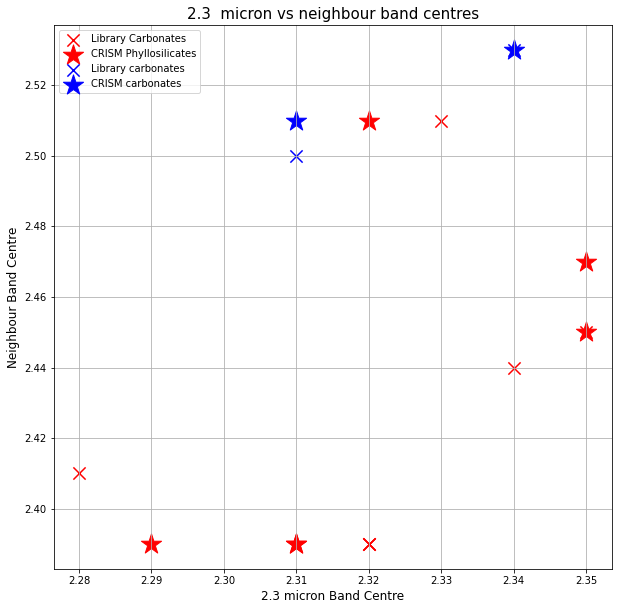

In [47]:
#create a figure and plot the four sets of points
plt.figure(figsize=(10,10))
plt.title("2.3  micron vs neighbour band centres",fontsize=15)
plt.xlabel("2.3 micron Band Centre",fontsize=12)
plt.ylabel("Neighbour Band Centre",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plot the library phyllosilicates
plt.scatter(libraryPhyllosilicate23BandCentre,
            libraryPhyllosilicateNeighbourBandCentre,
            s=libraryMarkerSize,
            color=phyllosilicateColor,
            marker=libraryMarker,
            label="Library Carbonates")
#plot the CRISM phyllosilicates
plt.scatter(crismPhyllosilicate23BandCentre,
            crismPhyllosilicateNeighbourBandCentre,
            s=crismMarkerSize,
            color=phyllosilicateColor,
            marker=crismMarker,
            label="CRISM Phyllosilicates")
#plot the library carbonates
plt.scatter(libraryCarbonate23BandCentre,
            libraryCarbonateNeighbourBandCentre,
            s=libraryMarkerSize,
            color=carbonateColor,
            marker=libraryMarker,
            label="Library carbonates")
#plot the CRISM carbonates
plt.scatter(crismCarbonate23BandCentre,
            crismCarbonateNeighbourBandCentre,
            s=crismMarkerSize,
            color=carbonateColor,
            marker=crismMarker,
            label="CRISM carbonates")

plt.grid(which="both")
plt.legend(loc="best",fontsize=10)

In [48]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples not plotted are:-\n\n")
for i in nonPlottedPhyllosilicateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples not plotted are:-


Al-Smectite--				--CRISM--				--[1.91 2.2 ]
Al-Smectite--				--Library--				--[1.91 2.21]
Chlorite--				--CRISM--				--[1.92 2.   2.25 2.35]
Chlorite--				--Library--				--[1.99 2.25 2.33]
Kaolinite--				--CRISM--				--[1.41 1.92 2.16 2.21 2.38]


In [49]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples plotted are:-\n\n")
for i in plottedPhyllosilicateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples plotted are:-


Fe-Smectite--				--CRISM--				--[1.91 2.29 2.39 2.52]
Fe-Smectite--				--Library--				--[1.9  2.23 2.28 2.41 2.5 ]
Illite/Muscovite--				--CRISM--				--[1.93 2.21 2.35 2.45]
Illite/Muscovite--				--Library--				--[1.91 2.22 2.35 2.45]
Kaolinite--				--Library--				--[1.41 1.92 2.16 2.21 2.32 2.39]
Margarite--				--CRISM--				--[2.   2.2  2.25 2.35 2.47]
Margarite--				--Library--				--[2.   2.21 2.26 2.34 2.44]
Mg-smectite--				--CRISM--				--[1.92 2.31 2.39]
Mg-smectite--				--Library--				--[1.91 2.32 2.39]
Serpentine--				--CRISM--				--[1.96 2.11 2.32 2.51]
Serpentine--				--Library--				--[1.96 2.12 2.33 2.51]
Talc--				--CRISM--				--[1.91 2.24 2.31 2.39 2.47]
Talc--				--Library--				--[1.91 2.23 2.32 2.39 2.47]


In [50]:
#print all carboante samples that weren't plotted
print("carbonate samples not plotted are:-\n\n")
for i in nonPlottedCarbonateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

carbonate samples not plotted are:-




In [51]:
#print all carbonate samples that were plotted
print("carbonate samples plotted are:-\n\n")
for i in plottedCarbonateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

carbonate samples plotted are:-


Fe/Ca carbonate--				--CRISM--				--[2.34 2.53 3.48 3.84]
Fe/Ca carbonate--				--Library--				--[2.34 2.53 2.79 3.35 3.48 3.85]
Mg Carbonate--				--CRISM--				--[2.31 2.51 3.46 3.84]
Mg Carbonate--				--Library--				--[2.31 2.5  3.27 3.43 3.8 ]
